In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('loan_data.csv',encoding='utf-8')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


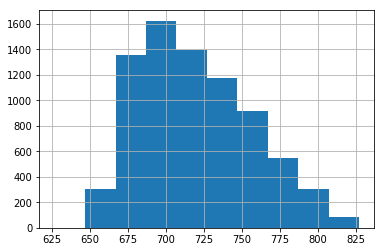

In [5]:
df[df["credit.policy"]==1]["fico"].hist()

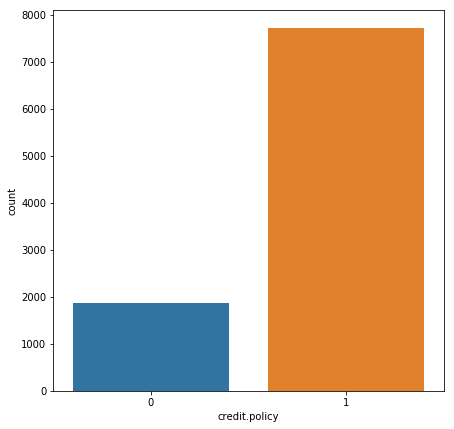

In [6]:
plt.figure(figsize=(7,7))
sns.countplot(df['credit.policy'])
plt.show()

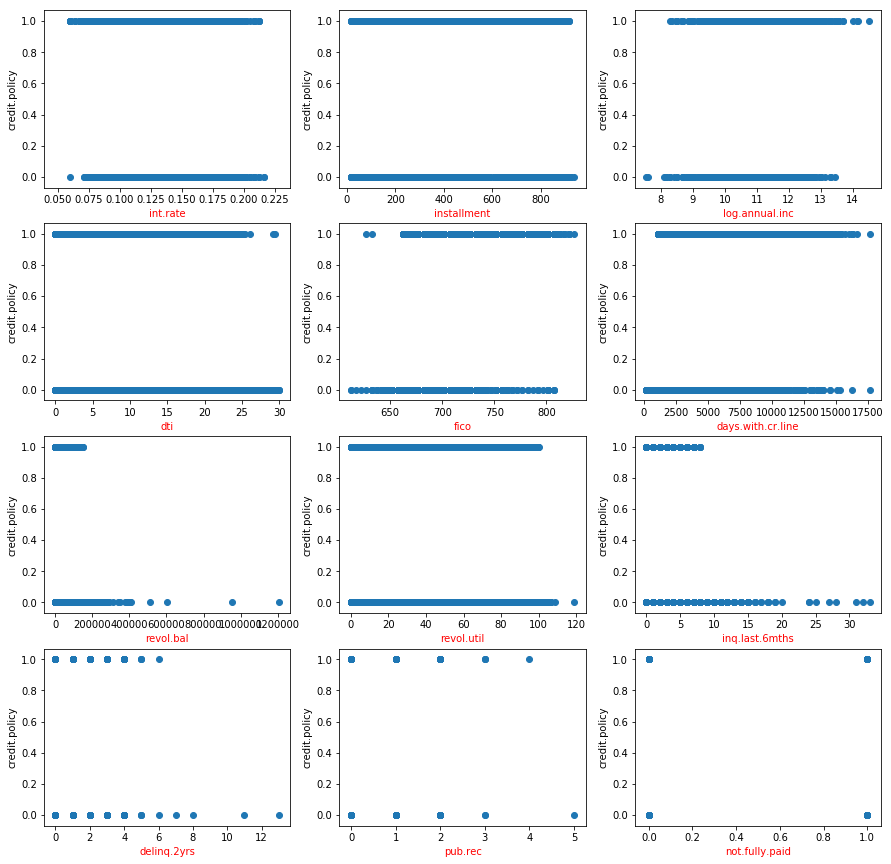

In [7]:
def show_data(data_name):
  fig,axs = plt.subplots(nrows=4,ncols=3,figsize=(15,15))
  b=0
  c=0
  a=3
  for i in data_name:
    axs[b,c].scatter(y=df['credit.policy'],x=df[f'{i}'])
    axs[b,c].set_ylabel('credit.policy')
    axs[b,c].set_xlabel(f'{i}',color='red')
    c+=1
    if c==a:
      b+=1
      c=0
    elif b==4:
      break
  plt.show()
show_data(df.columns[2:]) 

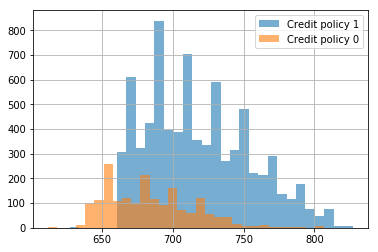

In [8]:
df[df["credit.policy"]==1]["fico"].hist(bins=30,alpha=0.6,label="Credit policy 1")
df[df["credit.policy"]==0]["fico"].hist(bins=30,alpha=0.6,label="Credit policy 0")
plt.legend()

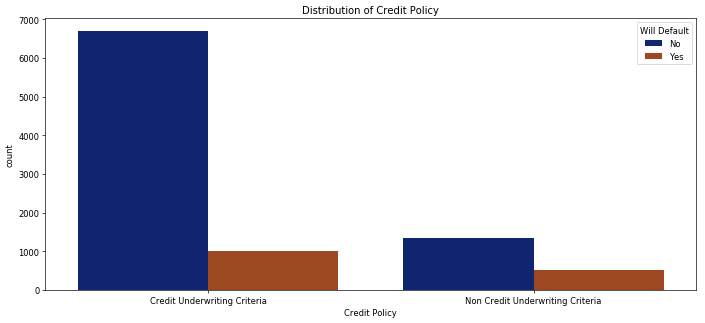

In [9]:
data_policy = df.copy()
data_policy['Credit Policy'] = data_policy['credit.policy'].map({0: 'Non Credit Underwriting Criteria',
                                                                  1: 'Credit Underwriting Criteria'})
data_policy['Will Default'] = data_policy['not.fully.paid'].map({0: 'No', 1: 'Yes'})
plt.figure(figsize=(14,6), dpi = 60)
sns.countplot(data = data_policy, x = 'Credit Policy', hue= 'Will Default', palette = 'dark')
plt.title('Distribution of Credit Policy')
plt.show()

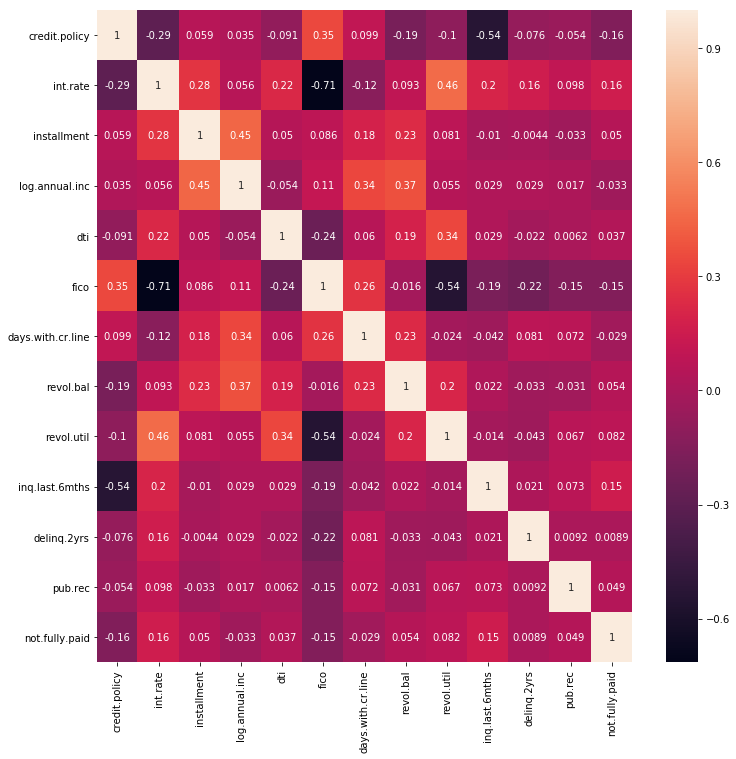

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
f,axes = plt.subplots(1,1,figsize = (12,12))
sns.heatmap(df.corr(), annot = True, ax = axes)

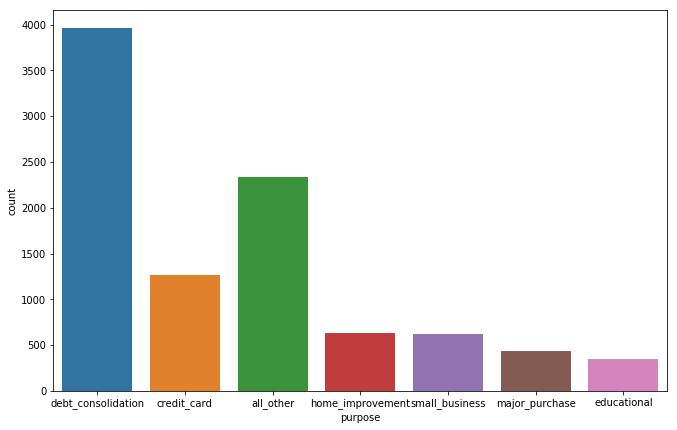

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(data=df,x="purpose")

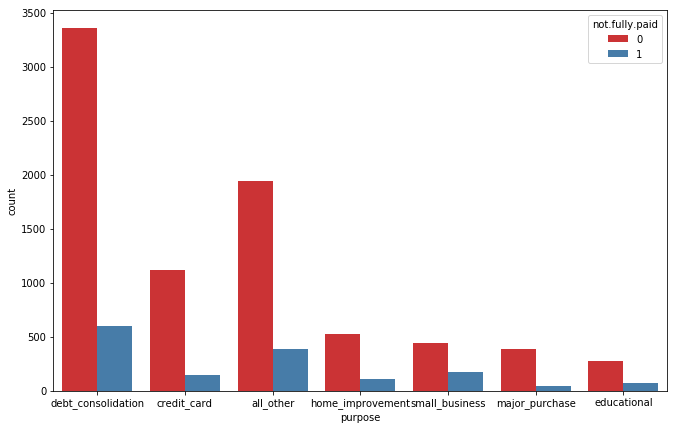

In [12]:
plt.figure(figsize=(11,7))
sns.countplot(data=df,x="purpose",hue="not.fully.paid",palette='Set1')

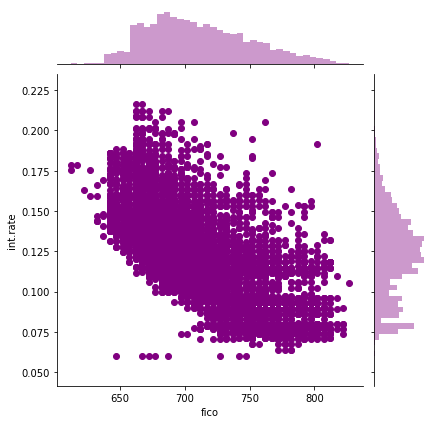

In [13]:
sns.jointplot(x="fico",y="int.rate",data=df,color='purple')

<Figure size 792x504 with 0 Axes>

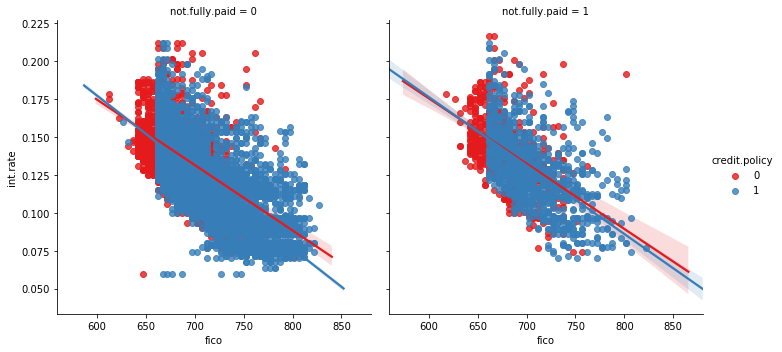

In [14]:
plt.figure(figsize=(11,7))
sns.lmplot(x="fico",y="int.rate",data=df,hue="credit.policy",col="not.fully.paid",palette='Set1')

In [15]:
#Separate Numerical Data
Num_Data = df[["int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", 
               "revol.util", "not.fully.paid"]]

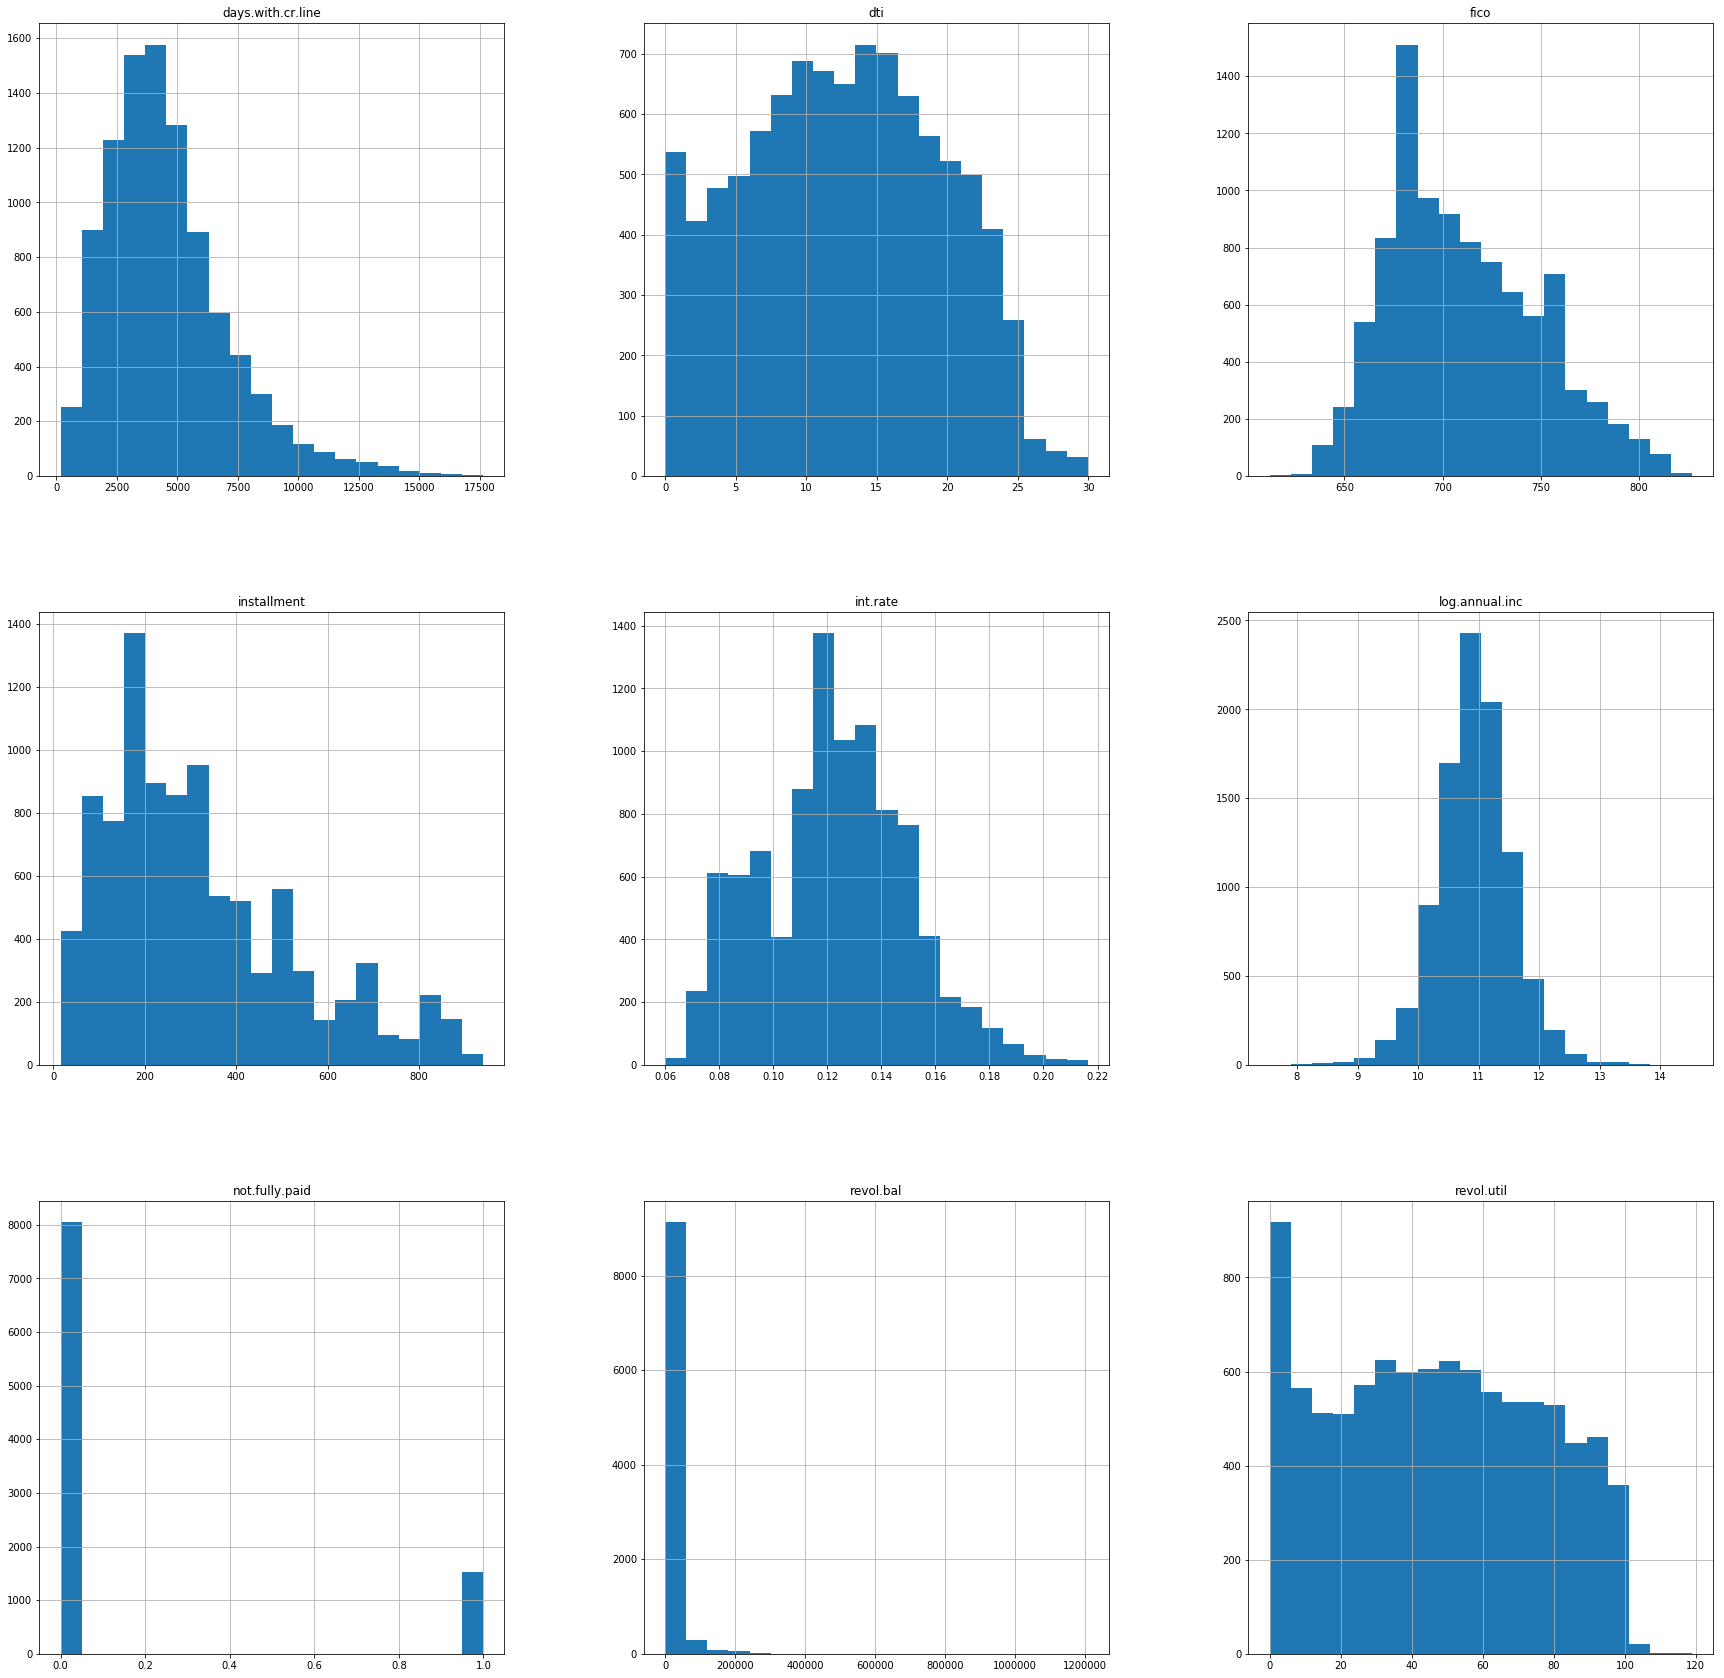

In [16]:
Num_Data.hist(figsize = (30, 30), bins = 20)
plt.show()

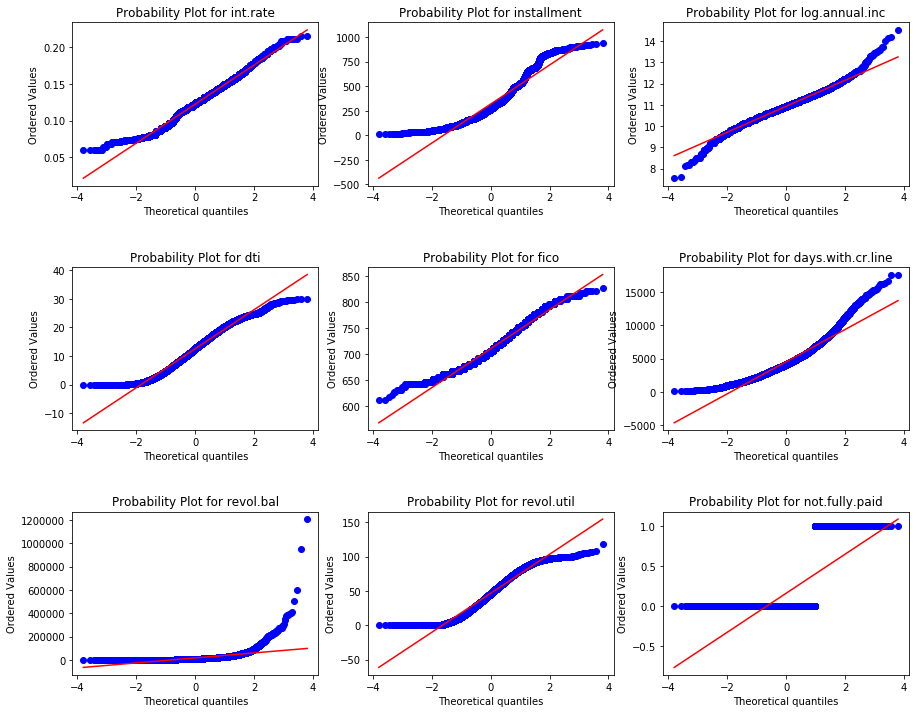

In [17]:
from scipy import stats
from scipy.stats import skew, norm
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12), sharex = True)
fig.subplots_adjust(hspace = 0.5)


for i, col in enumerate(Num_Data):
    ax = plt.subplot(3, 3, i+1)
    stats.probplot(Num_Data[col], plot = ax)
    ax.set_title(f"Probability Plot for {col}")

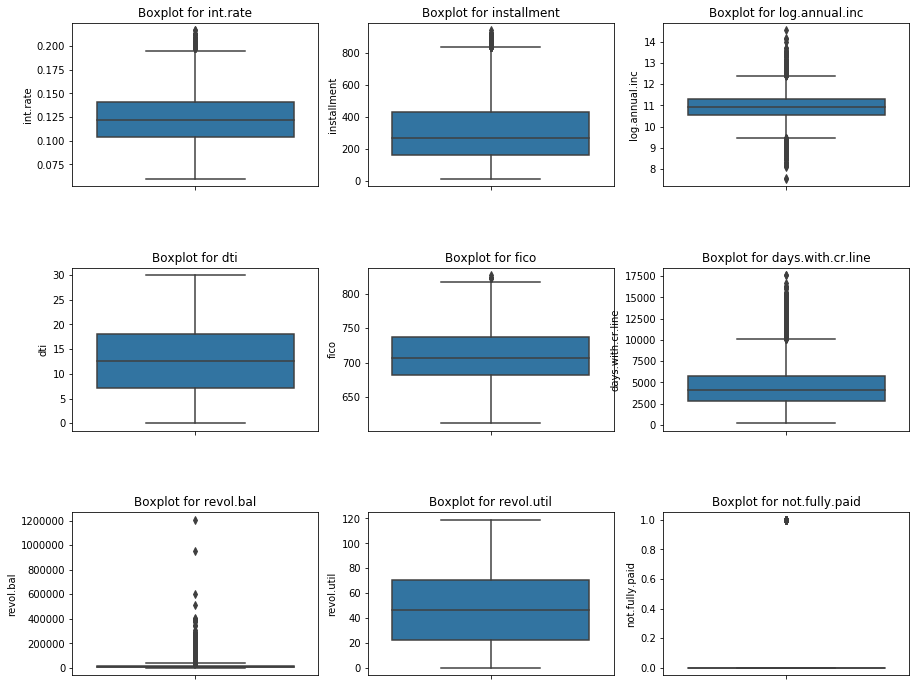

In [18]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12), sharex = True)
fig.subplots_adjust(hspace = 0.5)


for i, col in enumerate(Num_Data):
    ax = plt.subplot(3, 3, i+1)
    sns.boxplot(y = Num_Data[col])
    ax.set_title(f"Boxplot for {col}")
plt.show()

In [19]:
#Above Box plots clearly shows there are outliers in int.rate, installment, log.annual.inc, fico, days.with.cr.line and revol.bal

In [20]:
Cat_Data = df[["credit.policy", "purpose", "inq.last.6mths", "delinq.2yrs", "not.fully.paid"]]


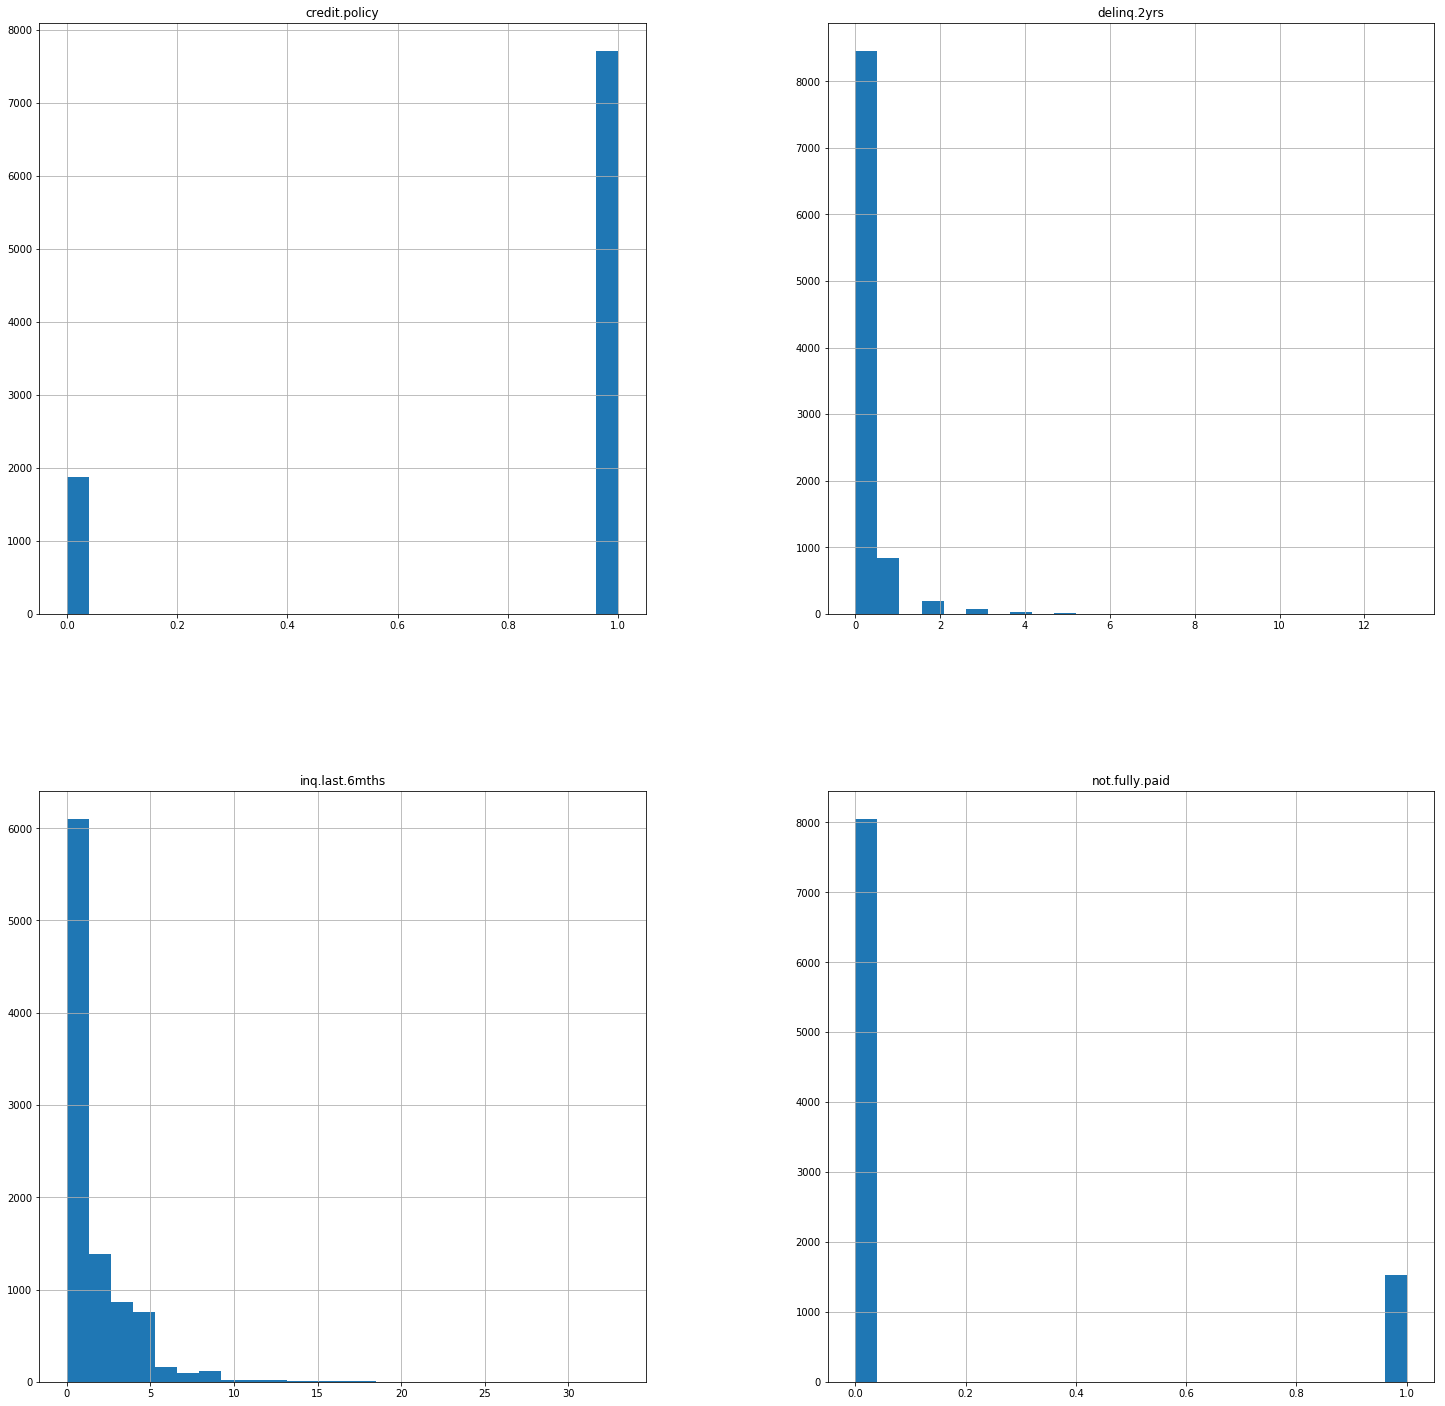

In [21]:
Cat_Data.hist(figsize = (25, 25), bins = 25)
plt.rcParams["font.size"] = "20"
plt.show()

In [22]:
# Separate data to include numerical data only
num_data = df[["int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", 
               "revol.util", "not.fully.paid"]]


In [23]:
# Detect outliers in combined data set
def detect_outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print(f"\nOutlier caps for {feature}")
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                             len([i for i in data
                                                                  if i > data.quantile(.99)])))

In [24]:
# Determine what the upperbound should be for continuous features in dataframe.
for feat in num_data:
    detect_outlier(feat)


Outlier caps for int.rate
  --95p: 0.2 / 456 values exceed that
  --3sd: 0.2 / 21 values exceed that
  --99p: 0.2 / 94 values exceed that

Outlier caps for installment
  --95p: 756.3 / 479 values exceed that
  --3sd: 940.3 / 0 values exceed that
  --99p: 870.4 / 107 values exceed that

Outlier caps for log.annual.inc
  --95p: 11.9 / 438 values exceed that
  --3sd: 12.8 / 86 values exceed that
  --99p: 12.5 / 96 values exceed that

Outlier caps for dti
  --95p: 23.6 / 478 values exceed that
  --3sd: 33.3 / 0 values exceed that
  --99p: 26.2 / 96 values exceed that

Outlier caps for fico
  --95p: 782.0 / 403 values exceed that
  --3sd: 824.8 / 1 values exceed that
  --99p: 802.0 / 90 values exceed that

Outlier caps for days.with.cr.line
  --95p: 9330.0 / 478 values exceed that
  --3sd: 12051.2 / 142 values exceed that
  --99p: 12930.0 / 96 values exceed that

Outlier caps for revol.bal
  --95p: 57654.3 / 479 values exceed that
  --3sd: 118177.2 / 159 values exceed that
  --99p: 156762.

In [25]:
# Capping features in df to remover outliers in numerical features

# Upper bounded outliers
for var in ['int.rate' ,'installment', 'log.annual.inc', 'fico', 'days.with.cr.line', 'revol.bal', 'not.fully.paid']:
    df[var].clip(upper=df[var].quantile(.95), inplace=True)
    
# Lower and Upper bounded outliers
for var in ['log.annual.inc']:
    df[var].clip(lower = df[var].quantile(.05), upper = df[var].quantile(0.95), inplace=True)

In [26]:
categorical_feature = ['purpose']
final_data = pd.get_dummies(df,columns=categorical_feature,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null float64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null float64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null float64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase   

In [27]:
from sklearn.model_selection import train_test_split
X = final_data.drop('credit.policy',axis=1)
y = final_data['credit.policy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [28]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,classification_report,accuracy_score,confusion_matrix

model_log=LogisticRegression(solver='lbfgs',max_iter=200,random_state=42).fit(X_train,y_train)
y_pred=model_log.predict(X_test)
# print(model_log)
print(confusion_matrix(y_test,y_pred))

[[ 330  221]
 [  90 2233]]


In [30]:
from sklearn.metrics import r2_score,classification_report,accuracy_score,confusion_matrix
print('Train success rate: %',model_log.score(X_train,y_train)*100)
print('Test success rate: %',accuracy_score(y_test,y_pred)*100)

Train success rate: % 89.67780429594272
Test success rate: % 89.17884481558804


In [31]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.79      0.60      0.68       551
          1       0.91      0.96      0.93      2323

avg / total       0.89      0.89      0.89      2874



In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94       551
          1       0.99      0.99      0.99      2323

avg / total       0.98      0.98      0.98      2874



In [34]:
print(confusion_matrix(y_test,predictions))

[[ 517   34]
 [  34 2289]]


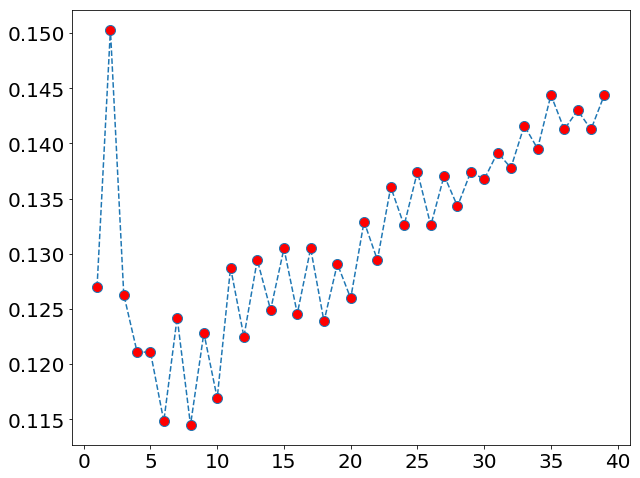

In [35]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred1=knn.predict(X_test)
    error_rate.append(np.mean(pred1 != y_test))

plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,marker='o',markerfacecolor='red',ls='--',markersize=10)

In [36]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
pred1=knn.predict(X_test)
print(knn.score(X_test,y_test))

0.8740431454418929


In [37]:
print(confusion_matrix(y_test,pred1))

[[ 197  354]
 [   8 2315]]


In [38]:
print(classification_report(y_test,pred1))

             precision    recall  f1-score   support

          0       0.96      0.36      0.52       551
          1       0.87      1.00      0.93      2323

avg / total       0.89      0.87      0.85      2874



In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 496   55]
 [   9 2314]]


In [40]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.90      0.94       551
          1       0.98      1.00      0.99      2323

avg / total       0.98      0.98      0.98      2874



In [41]:
#handling imbalanced dataset
credit_policy_0 = df[df['credit.policy'] == 0]
credit_policy_1 = df[df['credit.policy'] == 1]

print('credit_policy_0', credit_policy_0.shape)
print('credit_policy_1', credit_policy_1.shape)

credit_policy_0 (1868, 14)
credit_policy_1 (7710, 14)


In [42]:
#handling imbalanced data
from sklearn.utils import resample
df_minority_upsampled = resample(credit_policy_0, replace = True, n_samples = 8045)
df1 = pd.concat([credit_policy_1, df_minority_upsampled])

from sklearn.utils import shuffle
df2 = shuffle(df1)
#imbalanced data handled
df2['credit.policy'].value_counts()

0    8045
1    7710
Name: credit.policy, dtype: int64

In [43]:
categorical_feature = ['purpose']
df3 = pd.get_dummies(df2,columns=categorical_feature,drop_first=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15755 entries, 9264 to 8575
Data columns (total 19 columns):
credit.policy                 15755 non-null int64
int.rate                      15755 non-null float64
installment                   15755 non-null float64
log.annual.inc                15755 non-null float64
dti                           15755 non-null float64
fico                          15755 non-null float64
days.with.cr.line             15755 non-null float64
revol.bal                     15755 non-null float64
revol.util                    15755 non-null float64
inq.last.6mths                15755 non-null int64
delinq.2yrs                   15755 non-null int64
pub.rec                       15755 non-null int64
not.fully.paid                15755 non-null float64
purpose_credit_card           15755 non-null uint8
purpose_debt_consolidation    15755 non-null uint8
purpose_educational           15755 non-null uint8
purpose_home_improvement      15755 non-null uint8
purp

In [44]:
from sklearn.model_selection import train_test_split
X = df3.drop('credit.policy',axis=1)
y = df3['credit.policy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))


[[2395   10]
 [  23 2299]]


In [46]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2405
          1       1.00      0.99      0.99      2322

avg / total       0.99      0.99      0.99      4727



In [47]:
#Thank you